In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  collections import  Counter

In [3]:
train = pd.read_csv('./train.csv',engine='python')
test = pd.read_csv('./test.csv',engine='python')

In [4]:
X_train = train.body  # train texts
y_train = train.subreddit # train subreddits
X_test = test.body  # test texts

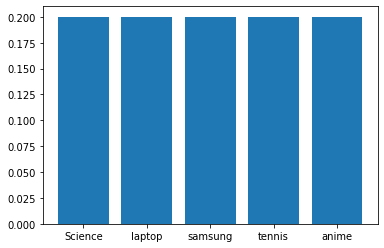

In [53]:
a=Counter(y_train)
dic = {number: value for number, value in a.items()}
x = ["Science","laptop","samsung","tennis","anime"]
y = []
for i in dic.keys():
  y.append(dic.get(i))
for j in range(5):
  y[j]=y[j]/len(y_train)
df = pd.DataFrame(y, x)

plt.bar(x,y,align='center')

plt.show()

## Feature extraction

###Processing based on sk-learn

In [12]:
from sklearn.preprocessing import Normalizer, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [6]:
# transform target labels to values
le = LabelEncoder()
y_train = le.fit_transform(y_train.values)

# vectorize word count
vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)
vectors_train = vectors_train.todense()
vectors_test = vectors_test.todense()

# onehot encoding
onehot = OneHotEncoder(handle_unknown = 'ignore')
vectors_train = onehot.fit_transform(vectors_train)
vectors_test = onehot.transform(vectors_test)

# print(vectorizer.get_feature_names())
print(vectors_train.shape)
print(vectors_test.shape)

(1999, 35729)
(1378, 35729)


# **Binary**



In [10]:
vectorizer = CountVectorizer(binary=True)
vectors_train_binary = vectorizer.fit_transform(X_train)
vectors_test_binary = vectorizer.transform(X_test)


In [17]:
# remove stop words
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = CountVectorizer(stop_words = stop_words)
vectors_train_stop = vectorizer.fit_transform(X_train)
vectors_test_stop = vectorizer.transform(X_test)

normalizer_train = Normalizer()
vectors_train_stop= normalizer_train.transform(vectors_train_stop)
vectors_test_stop = normalizer_train.transform(vectors_test_stop)
print(vectors_train_stop.shape)
print(vectors_test_stop.shape)

(1999, 15079)
(1378, 15079)


In [ ]:
# tf-idf
tf_idf_vectorizer = TfidfVectorizer()
vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train)
vectors_test_idf = tf_idf_vectorizer.transform(X_test)
vectors_train_idf= normalizer_train.transform(vectors_train_idf)
vectors_test_idf = normalizer_train.transform(vectors_test_idf)
print(vectors_train_idf.shape)
print(vectors_test_idf.shape)

(1999, 15365)
(1378, 15365)


### Processing based on nltk

In [15]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


####Stemming
features: `vector_train_stem`, `vector_test_stem`

In [ ]:
# stemming
class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(tokenizer=StemTokenizer())
vectors_train_stem = vectorizer.fit_transform(X_train)
vectors_test_stem = vectorizer.transform(X_test)
vectors_train_stem= normalizer_train.transform(vectors_train_stem)
vectors_test_stem = normalizer_train.transform(vectors_test_stem)
print(vectors_train_stem.shape)
print(vectors_test_stem.shape)

(1999, 8727)
(1378, 8727)


#### Lemmatization
features: `vector_train_Lemma`, `vector_test_Lemma`

In [14]:
# Lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
  
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(tokenizer=New_LemmaTokenizer())
vectors_train_Lemma = vectorizer.fit_transform(X_train)
vectors_test_Lemma = vectorizer.transform(X_test)
vectors_train_Lemma= normalizer_train.transform(vectors_train_Lemma)
vectors_test_Lemma = normalizer_train.transform(vectors_test_Lemma)
print(vectors_train_Lemma.shape)
print(vectors_test_Lemma.shape)

NameError: ignored

#### Put it all together
features: `vector_train_stop_Lemma`, `vector_test_stop_Lemma`

In [ ]:
# put it all together: remove stopwords, tfidf, punctuation, lemmatization, normalization
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

tf_idf_transformer = TfidfTransformer()
vectorizer = CountVectorizer(stop_words = stop_words,tokenizer=New_LemmaTokenizer())
vectors_train_stop_Lemma = vectorizer.fit_transform(X_train)
vectors_train_stop_Lemma = tf_idf_transformer.fit_transform(vectors_train_stop_Lemma)

vectors_test_stop_Lemma = vectorizer.transform(X_test)
vectors_test_stop_Lemma = tf_idf_transformer.transform(vectors_test_stop_Lemma)
vectors_train_stop_Lemma = normalizer_train.transform(vectors_train_stop_Lemma)
vectors_test_stop_Lemma = normalizer_train.transform(vectors_test_stop_Lemma)

# print(vectorizer.get_feature_names())
print(vectors_train_stop_Lemma.shape)
print(vectors_test_stop_Lemma.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1999, 9779)
(1378, 9779)


# **put it all together binary**

In [ ]:
# put it all together: remove stopwords, punctuation, lemmatization, 
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(stop_words = stop_words,tokenizer=New_LemmaTokenizer(),binary=True)
vectors_train_stop_Lemma_binary = vectorizer.fit_transform(X_train)
vectors_test_stop_Lemma_binary = vectorizer.transform(X_test)


# print(vectorizer.get_feature_names())
# print(vectors_train_stop_Lemma_binary)
print(vectors_test_stop_Lemma_binary.shape)

## Experiments with models in sk-learn

vectors_train，vectors_test是加了onehot的，vectors_train_stop_Lemma是把几种处理都加上的，target是y_train

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
X_train = vectors_train_stop_Lemma
y_train = y_train
X_test = vectors_test_stop_Lemma
# y_test unknown
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9409704852426213

In [ ]:
X_train = vectors_train
y_train = y_train
X_test = vectors_test
# y_test unknown
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9074537268634317

## Kfold cv

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [ ]:
X = vectors_train_stop_Lemma
y = y_train
# X_test = vectors_test_stop_Lemma
# y_test unknown

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    print("test accu: ", model.score(X_test, y_test))

KeyError: ignored

## Bernoulli NB model

In [ ]:
import time
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
class Bernoulli_NB():
  def __init__(self, LaplaceSmoothing = True):
    self.LaplaceSmoothing = LaplaceSmoothing
    self.Prob_Y = None      # P(Y)
    self.Prob_X_Y = None     # P(xj|Y)
    self.Prob_X_Y = None     # P(xj|Y)
    self.n_class = 0
    self.w0 = None
    self.w = None
    self.Ytarget = None


  def ProbY(self, Y):
    # calculate P(Y=1) and P(Y=0)
    ProbY = np.zeros((1,2))
    #print('shape',np.shape(Y))
    ProbY[0,1] = np.sum(Y)/np.shape(Y)
    ProbY[0,0] = 1 - ProbY[0,1]
    return ProbY

  def ProbX_Yi(self, X, Y, label):
    # calculte P(xj=1|Yi=1)
    rows,cols = X.shape       # feature shape
    numerator = np.zeros(cols)    # initialize numerator

    # xj=1 and Yi=1
    for n in range(rows):
      if Y[n] == label:
        numerator += X[n,:]
    # Yi=1
    denominator = np.count_nonzero(Y == label)
    # Laplace Smoothing
    if(self.LaplaceSmoothing):
      numerator += 1
      denominator += 2
    # P(xj=1|Yi=1)
    prob = numerator/denominator
    return prob    

  def fit(self, X, Y):
    print('----------------------start fitting---------------------')
    t1 = time.time()

    rows,cols = X.shape              # feature shape
    self.n_class = len(np.unique(Y))       # number of classes
    self.Prob_Y = np.zeros((self.n_class,2))   # initialize P(Y)
    self.Prob_X_Y = np.zeros((self.n_class,2,cols)) # initialize P(x|Y)
    c = np.zeros((self.n_class,cols))       # rows:class cols:xj
    d = np.zeros((self.n_class,cols))       # rows:class cols:xj
    self.w0 = np.zeros((1,self.n_class))     # [w0Y1,w0Y2,...]
    self.w = np.zeros((self.n_class,cols))    # [(w1,w2,...)Y1;
                            # (w1,w2,...)Y2]
    self.Ytarget = np.unique(Y)
    Y_index = 0
    for Yi in self.Ytarget:
      Y_onevsall = np.where(Y == Yi, 1, 0)    # only have 2 classes: Yi(1) & notYi(0)
      self.Prob_Y[Y_index,:] = self.ProbY(Y_onevsall)   # [P(notYi), P(Yi)]
      self.Prob_X_Y[Y_index,0,:] = self.ProbX_Yi(X,Y_onevsall,0)  # [P(x1|notYi), P(x2|notYi),...]
      self.Prob_X_Y[Y_index,1,:] = self.ProbX_Yi(X,Y_onevsall,1)  # [P(x1|Yi), P(x2|Yi),...]
      c[Y_index,:] = np.log10(self.Prob_X_Y[Y_index,1,:]/self.Prob_X_Y[Y_index,0,:])     # log(P(xj|Y=1)/P(xj|Y=0))
      d[Y_index,:] = np.log10((1-self.Prob_X_Y[Y_index,1,:])/(1-self.Prob_X_Y[Y_index,0,:])) # log((1-P(xj|Y=1))/(1-P(xj|Y=0)))
      self.w0[0,Y_index] = np.log10(self.Prob_Y[Y_index,1]/self.Prob_Y[Y_index,0]) + np.sum(d[Y_index,:])
      self.w[Y_index,:] = c[Y_index,:] - d[Y_index,:]
      Y_index += 1

    print('------fit done, total time:',time.time()-t1,' -----')
    # return self.Prob_Y,self.Prob_X_Y

  def predict(self, X):
    print('----------------------start predict---------------------')
    t1 = time.time()

    rows,cols = X.shape       # feature shape
    PreY = np.empty((rows,1),dtype='S') # initialize Y
    print('type',type(PreY))
    LogOddsRatio = np.zeros((1,self.n_class))  # initialize log odds ratio a(x) 
    Logistic = np.zeros((1,self.n_class))    # initialize logistic function
    Y_index = 0
    for obs in range(rows):
      for Yi in self.Ytarget:
        LogOddsRatio[0,Y_index] = self.w0[0,Y_index] + np.sum((self.w[Y_index,:]*X[obs,:])) 
        Logistic[0,Y_index] = 1/(1+np.exp(-LogOddsRatio[0,Y_index]))
        Y_index += 1
      Y_index = 0
      print(np.where(Logistic == np.amax(Logistic))[1])
      PreY[obs] = self.Ytarget[np.where(Logistic == np.amax(Logistic))[1]]
    print('------predict done, total time:',time.time()-t1,' -----')
    return PreY

  def Accu_eval(self,PreY,TrueY):
    #y_predict = self.predict(X_test)
    rows,cols = np.shape(PreY)
    TP = 0;FP = 0;TN = 0;FN = 0
    # count TP,TN,FP,FN in validation set
    for obs in range(rows):
      if  TrueY[obs]==1 and PreY[obs]==1:
        TP = TP+1
      elif TrueY[obs]==0 and PreY[obs]==0:
        TN = TN+1
      elif TrueY[obs]==0 and PreY[obs]==1:
        FP = FP+1
      elif TrueY[obs]==1 and PreY[obs]==0:
        FN = FN+1    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F = 2*precision*recall/(precision+recall)
    specificity = TN/(FP+TN)
    FPR = FP/(FP+TN)
    print("---------------------accuracy:",accuracy,'-------------------')
    return accuracy


In [ ]:
B = Bernoulli_NB()

parameters = {
...     'vect__ngram_range': [(1, 1), (1, 2)],
...     'tfidf__use_idf': (True, False),
... }

B.fit(vectors_train,y_train)
#PreY = B.predict(vectors_test)
PreY = B.predict(vectors_train)
#B.Accu_eval(PreY,Ytest)

----------------------start fitting---------------------
------fit done, total time: 3.900989055633545  -----
----------------------start predict---------------------
type <class 'numpy.ndarray'>


ValueError: ignored